# Predicting Employee Retention
***
## Background:
Simulated data downloaded from the Kaggle dataset called "Human Resources Analytics".

https://www.kaggle.com/ludobenistant/hr-analytics

**Primary Question**

Why are our best and most experienced employees leaving prematurely? 


**Fields in the dataset include:**

* Satisfaction Level
* Last evaluation
* Number of projects
* Average monthly hours
* Time spent at the company
* Whether they have had a work accident
* Whether they have had a promotion in the last 5 years
* Departments (column sales)
* Salary
* Whether the employee has left **(Target Variable)**
***
## Findings:
* It is possible to predict employee retention, given the current variables, with a 98% accuracy
* Variables in order of impact to retention:
    1. **Satisfaction**
    2. **Tenure**
    3. **Work Accident**
    4. **Average Monthly Hours**
    5. **Promotions in 5 years**

***
## Outline:
* Part 1 - Load Data
* Part 2 - Initial Investigation
* Part 3 - Distributions
* Part 4 - Investigate Target Variable
* Part 5 - Correlations
* Part 6 - Building the Model

***

# Part 1: Load Data
***

## 1a. Importing Applicable Libraries
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
hr = pd.read_csv("HR_comma_sep.csv")

## 1b. Moving Target Variable to the Front
***

In [3]:
front = hr['left']
hr.drop(labels=['left'], axis=1,inplace = True)
hr.insert(0, 'left', front)

# Part 2: Initial Investigation
***

### Takeaways:
* No missing data
* 10 columns consisting of integer, string, and boolean values
* 14,998 records
* Pretty good amount of variation in hours worked

# 2a. Peak into the data
***

In [4]:
hr.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


# 2b. Data Types
***

In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
left                     14999 non-null int64
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# 2c. Descriptive Statistics
***

In [6]:
hr.describe()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


# Part 3: Distributions
***

### Takeaways:
* Interesting ditributions with some peaks in hours worked, and satisfaction levels
* Much more on less expereince with projects and salary level
* Everyone had at least 2 projects
* Sales is the largest department followed by Technical and Support

### 3a. Satisfaction, Evaluations, and Hours

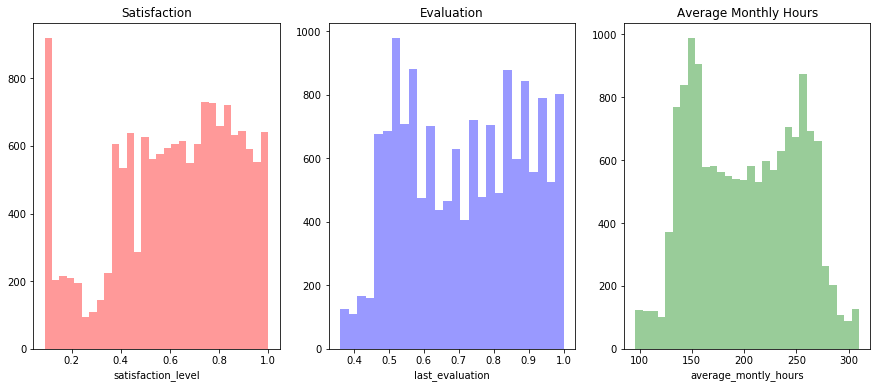

In [7]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.distplot(hr.satisfaction_level, kde=False, color="red", ax=axes[0]).set_title('Satisfaction')
sns.distplot(hr.last_evaluation, kde=False, color="blue", ax=axes[1]).set_title('Evaluation')
sns.distplot(hr.average_montly_hours, kde=False, color="green", ax=axes[2]).set_title('Average Monthly Hours')

## 3b. Frequency Charts for Projects, Salary, and Left

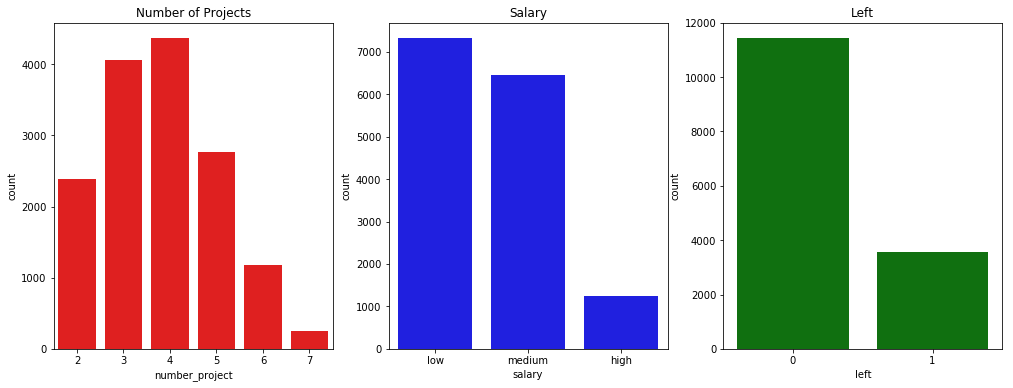

In [8]:
f, axes = plt.subplots(ncols=3, figsize=(17, 6))
sns.countplot(hr.number_project, color="red", ax=axes[0]).set_title('Number of Projects')
sns.countplot(hr.salary, color="blue", ax=axes[1]).set_title('Salary')
sns.countplot(hr.left, color="green", ax=axes[2]).set_title('Left')

## 3c. Frequency Chart for Departments

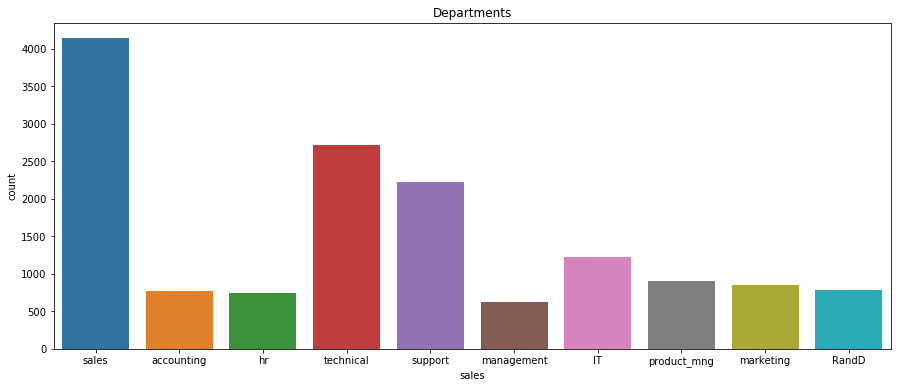

In [9]:
f, axes = plt.subplots(figsize=(15, 6))
sns.countplot(hr.sales).set_title('Departments')

# Part 4: Investigate Target Variable
***

### Takeaways:
* Sales lost the largest amount of employees
* Higher rate of leaving in the lower salary region
* Those that left tended to work more hours and had a lower satisfaction level

## 4a. Basic Breakdown

In [10]:
turnover_summary = hr.groupby('left')
turnover_summary.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## 4b. Department vs Left

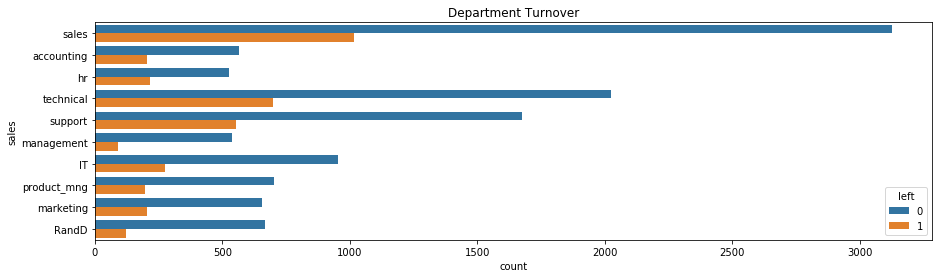

In [11]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="sales", hue='left', data=hr).set_title('Department Turnover')

## 4c. Salary vs Left

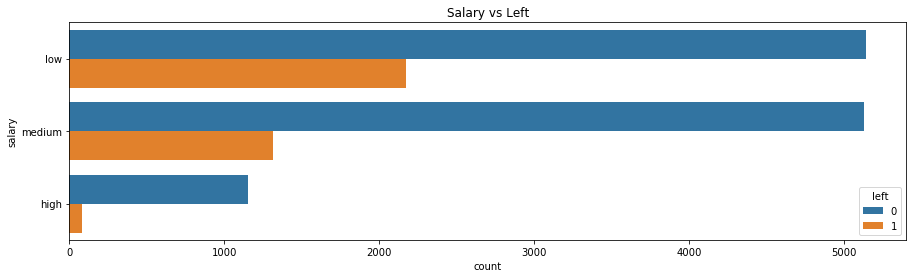

In [12]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='left', data=hr).set_title('Salary vs Left')

## 4d. Work Accident vs Left

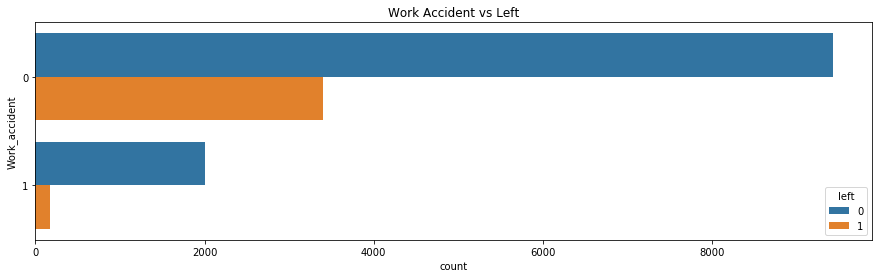

In [13]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="Work_accident", hue='left', data=hr).set_title('Work Accident vs Left')

## 4e. Evaluation vs Left (KDE)

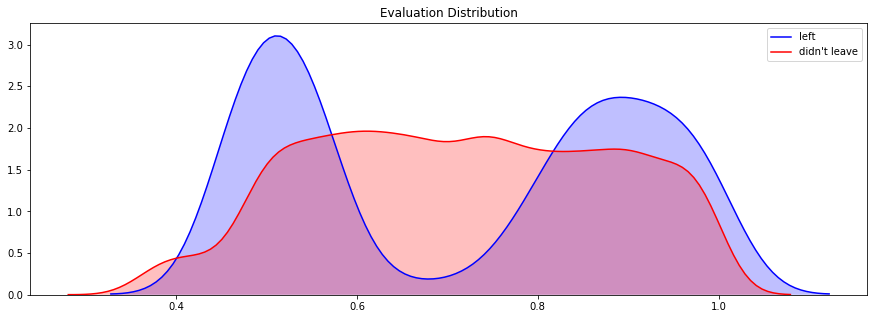

In [14]:
# Kernel Density Plot (KDE)
fig = plt.figure(figsize=(15,5),)
ax=sns.kdeplot(hr.loc[(hr['left'] == 1),'last_evaluation'] , color='blue',shade=True,label="left")
ax=sns.kdeplot(hr.loc[(hr['left'] == 0),'last_evaluation'] , color='red',shade=True, label="didn't leave")
plt.title('Evaluation Distribution')

## 4f. Satisfaction vs Left (KDE)

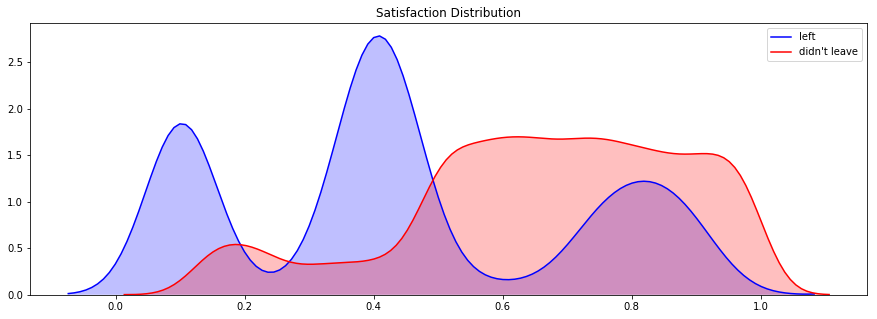

In [15]:
# Kernel Density Plot (KDE)
fig = plt.figure(figsize=(15,5),)
ax=sns.kdeplot(hr.loc[(hr['left'] == 1),'satisfaction_level'] , color='blue',shade=True,label="left")
ax=sns.kdeplot(hr.loc[(hr['left'] == 0),'satisfaction_level'] , color='red',shade=True, label="didn't leave")
plt.title('Satisfaction Distribution')

## 4g. Monthly Hours vs Left (KDE)

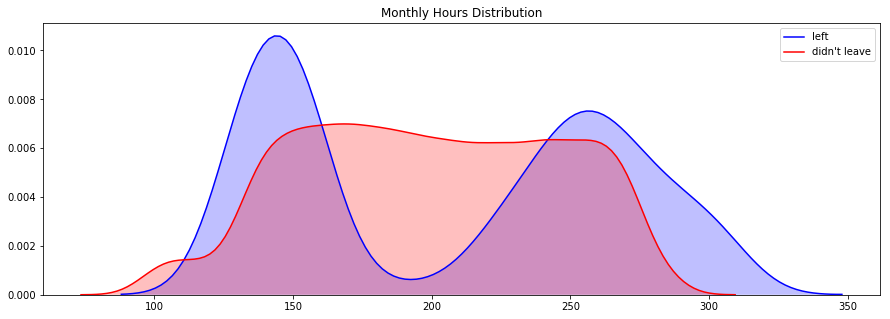

In [16]:
# Kernel Density Plot (KDE)
fig = plt.figure(figsize=(15,5),)
ax=sns.kdeplot(hr.loc[(hr['left'] == 1),'average_montly_hours'] , color='blue',shade=True,label="left")
ax=sns.kdeplot(hr.loc[(hr['left'] == 0),'average_montly_hours'] , color='red',shade=True, label="didn't leave")
plt.title('Monthly Hours Distribution')

## 4h. Tenure vs Left (KDE)

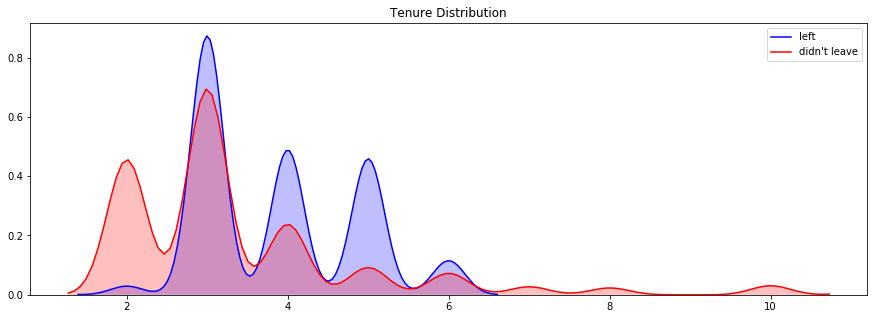

In [17]:
# Kernel Density Plot (KDE)
fig = plt.figure(figsize=(15,5),)
ax=sns.kdeplot(hr.loc[(hr['left'] == 1),'time_spend_company'] , color='blue',shade=True,label="left")
ax=sns.kdeplot(hr.loc[(hr['left'] == 0),'time_spend_company'] , color='red',shade=True, label="didn't leave")
plt.title('Tenure Distribution')

# Part 5: Correlation
***

### Takeaways:
* No highly cooralated variables
* However, there are some varables that corralate well with the target variable

## 5a. Correlation Matrix

In [18]:
corr = hr.corr()
corr

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction_level,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
last_evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
number_project,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
average_montly_hours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
time_spend_company,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
Work_accident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion_last_5years,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


## 5b. Heatmap

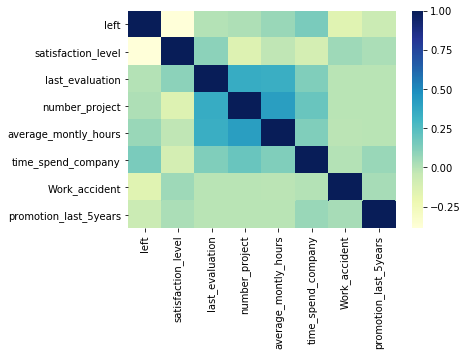

In [19]:
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
          cmap="YlGnBu")

## 5c. Pairplot

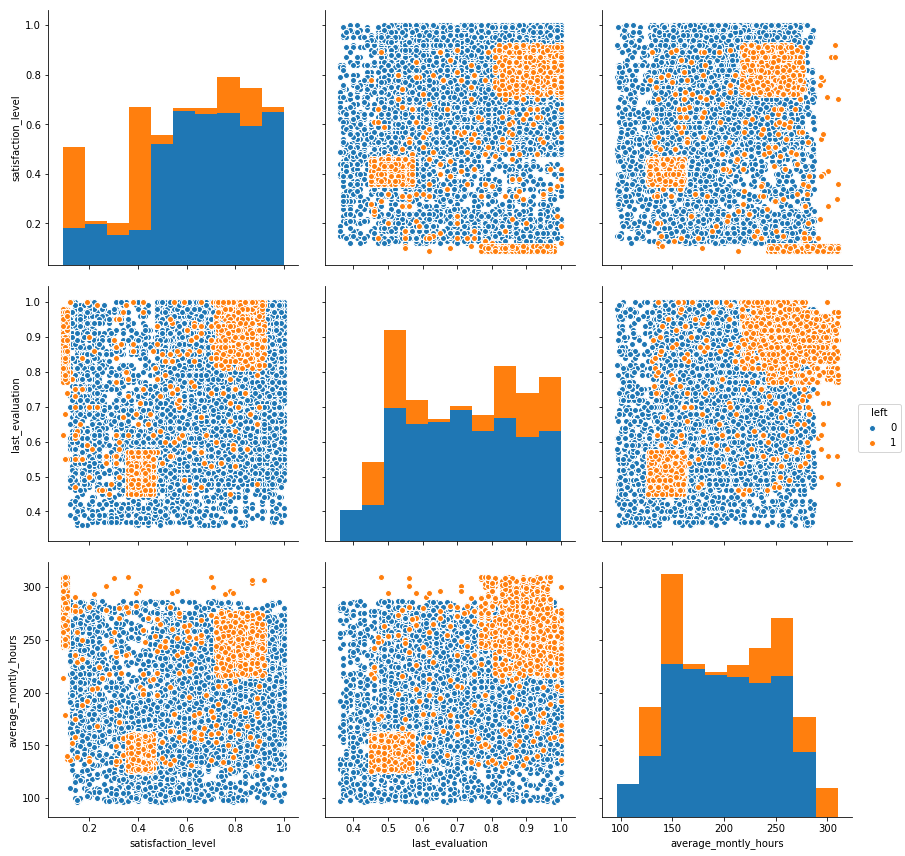

In [20]:
sns.pairplot(hr, hue="left", vars=["satisfaction_level", "last_evaluation", "average_montly_hours"], size=4)

# Part 6: Building the Model
***

### Takeaways:
* Decision Tree performed better than the Logistic Regression and would likely perform even better if I used Random Forests
* High accuracy to predict if an employee would leave the company with the variables provided

## 6a. Importing Applicable Libraries

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

## 6b. Convert Categorical Variables


In [22]:
# Create dummy variables
department = pd.get_dummies(data=hr['sales'],drop_first=True,prefix='dep') ##Check
salary = pd.get_dummies(data=hr['salary'],drop_first=True,prefix='sal') ##Check
hr.drop(['sales','salary'],axis=1,inplace=True)
hr = pd.concat([hr,department,salary],axis=1)

## 6c. Create Test and Train Dataset

In [23]:
X_train, X_test, y_train, y_test = train_test_split(hr.drop('left',axis=1), 
                                                    hr['left'], test_size=0.30, 
                                                    random_state=321)

## 6d. Logistic Regression Model + Model Evaulation

In [24]:
# Using default options
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
predictions = logmodel.predict(X_test)

In [26]:
# Run the classification report
print(classification_report(y_test,predictions)) ##Check

             precision    recall  f1-score   support

          0       0.81      0.93      0.87      3423
          1       0.58      0.32      0.41      1077

avg / total       0.76      0.78      0.76      4500



## 6e. Decision Tree Model + Model Evaulation

In [27]:
# Using default options
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
predictions = dtree.predict(X_test)

In [29]:
# Improves over the Logistic Model by a considerable scale
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      3423
          1       0.94      0.95      0.94      1077

avg / total       0.97      0.97      0.97      4500

